In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
print('Shape of data :',data.shape)

Shape of data : (303, 14)


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data set description

1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [7]:
print('Number of null rows in each column :')
print(data.isnull().sum())

Number of null rows in each column :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
print('Correlation of other columns with target column :')
print(data.corr()["target"].abs().sort_values(ascending=False))

Correlation of other columns with target column :
target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Spliting of data into training and testing

In [9]:
def split_data(training_size):
    predictors = data.drop("target",axis=1)
    target = data["target"]
    X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=(1-training_size),random_state=0)
    print("\n Training features have {0} records and Testing features have {1} records.".\
          format(X_train.shape[0], X_test.shape[0]))
    
    return X_train,X_test,Y_train,Y_test

### Confusion matrix function

In [10]:
def my_confusion_matrix(Y_test,y_test_predicted):
    cm = confusion_matrix(Y_test,y_test_predicted)
    print('Confusion Matrix of the Classifier:')
    print(cm)

    sns.heatmap(cm,annot = True,cmap='coolwarm', fmt = "d")

### Precision,Recall and F-score function

In [11]:
def calculate_score(Y_test, y_test_predicted):

    my_precision_score = precision_score(Y_test, y_test_predicted)
    print(' Precision Score of the Classifier is : '+str(my_precision_score))

    my_recall_score = recall_score(Y_test, y_test_predicted)
    print(' Recall Score of the Classifier is : '+str(my_recall_score))

    my_f_score = f1_score(Y_test, y_test_predicted)
    print(' F-Score of the Classifier is : '+str(my_f_score))

In [12]:
training_size = 0.7
X_train,X_test,Y_train,Y_test = split_data(training_size)


 Training features have 212 records and Testing features have 91 records.


# Logistic Regression

In [13]:
logistic_clf = LogisticRegression(random_state=0)
logistic_clf.fit(X_train, Y_train)

print('Logistic Regression Classfier')

y_train_predicted_logistic = logistic_clf.predict(X_train)
print('Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_logistic)))

y_test_predicted_logistic = logistic_clf.predict(X_test)
print('Testing accuracy : %.4f' % (100*acc(Y_test, y_test_predicted_logistic)))

Logistic Regression Classfier
Training accuracy : 86.3208
Testing accuracy : 83.5165


Logistic Regression
Confusion Matrix of the Classifier:
[[33 11]
 [ 4 43]]
 Precision Score of the Classifier is : 0.7962962962962963
 Recall Score of the Classifier is : 0.9148936170212766
 F-Score of the Classifier is : 0.8514851485148516


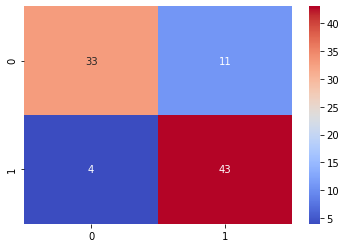

In [14]:
print('Logistic Regression')
my_confusion_matrix(Y_test,y_test_predicted_logistic)
calculate_score(Y_test, y_test_predicted_logistic)

# Decision Tree Using Gini Index (Using Sklearn)

In [15]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [16]:
decision_tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth=3,max_features = 5, random_state=0)

decision_tree_clf.fit(X_train, Y_train)

print('Decision Tree Classfier')

y_train_predicted_dt = decision_tree_clf.predict(X_train)
print('Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

y_test_predicted_dt = decision_tree_clf.predict(X_test)
print('Testing accuracy : %.4f' % (100*acc(Y_test, y_test_predicted_dt)))

Decision Tree Classfier
Training accuracy : 84.9057
Testing accuracy : 75.8242


Decision Tree Using Gini Index (Using Sklearn)
Confusion Matrix of the Classifier:
[[32 12]
 [10 37]]
 Precision Score of the Classifier is : 0.7551020408163265
 Recall Score of the Classifier is : 0.7872340425531915
 F-Score of the Classifier is : 0.7708333333333333


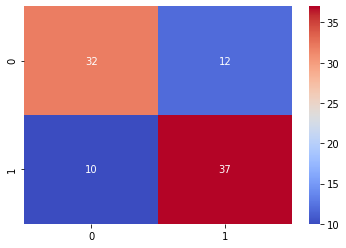

In [17]:
print('Decision Tree Using Gini Index (Using Sklearn)')
my_confusion_matrix(Y_test,y_test_predicted_dt)
calculate_score(Y_test, y_test_predicted_dt)

# Decision Tree Using Information Gain (Using Sklearn)

In [18]:
decision_tree_clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3,max_features = 5, random_state=0)

decision_tree_clf.fit(X_train, Y_train)

print('Decision Tree Classfier')

y_train_predicted_dt = decision_tree_clf.predict(X_train)
print('Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

y_test_predicted_dt = decision_tree_clf.predict(X_test)
print('Testing accuracy : %.4f' % (100*acc(Y_test, y_test_predicted_dt)))

Decision Tree Classfier
Training accuracy : 84.4340
Testing accuracy : 76.9231


Decision Tree Using Information Gain (Using Sklearn)
Confusion Matrix of the Classifier:
[[32 12]
 [ 9 38]]
 Precision Score of the Classifier is : 0.76
 Recall Score of the Classifier is : 0.8085106382978723
 F-Score of the Classifier is : 0.7835051546391754


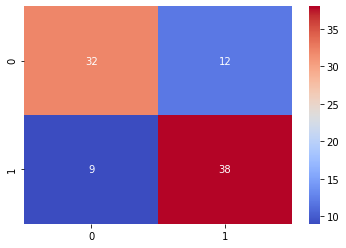

In [19]:
print('Decision Tree Using Information Gain (Using Sklearn)')
my_confusion_matrix(Y_test,y_test_predicted_dt)
calculate_score(Y_test, y_test_predicted_dt)

# Decision Tree Using Gini Index (from scratch) 

In [20]:
class TreeNode:
    def __init__(self, data,output):
        # data represents the feature upon which the node was split when fitting the training data
        # data = None for leaf node
        self.data = data
        # children of a node are stored as a dicticionary with key being the value of feature upon which the node was split
        # and the corresponding value stores the child TreeNode
        self.children = {}
        # output represents the class with current majority at this instance of the decision tree
        self.output = output
        # index will be used to assign a unique index to each node
        self.index = -1
        
    def add_child(self,feature_value,obj):
        self.children[feature_value] = obj

In [21]:
class decision_tree:
    def __init__(self):
        # root represents the root node of the decision tree built after fitting the training data
        self.__root = None

    def __count_unique(self,Y):
        # returns a dictionary with keys as unique values of Y(i.e no of classes) and the corresponding value as its frequency
        d = {}
        for i in Y:
            if i not in d:
                d[i]=1
            else:
                d[i]+=1
        return d


    def __entropy(self,Y):
        # returns the entropy 
        freq_map = self.__count_unique(Y)
        entropy_ = 0
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total
            entropy_ =entropy_ + (-p)*math.log2(p)
        return entropy_

    def __gain_ratio(self,X,Y,selected_feature):
        # returns the gain ratio
        info_orig = self.__entropy(Y) # info_orig represents entropy before splitting
        info_f = 0  # info_f represents entropy after splitting upon the selected feature
        split_info = 0
        values = set(X[:,selected_feature])
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]
            current_size = df1.shape[0]
            info_f += (current_size/initial_size)*self.__entropy(df1[df1.shape[1]-1])
            split_info += (-current_size/initial_size)*math.log2(current_size/initial_size)

        # to handle the case when split info = 0 which leads to division by 0 error
        if split_info == 0 :
            return math.inf

        info_gain = info_orig - info_f
        gain_ratio = info_gain / split_info
        return gain_ratio

    def __gini_index(self,Y):
        # returns the gini index 
        freq_map = self.__count_unique(Y)
        gini_index_ = 1
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total
            gini_index_ = gini_index_ - p**2
        return gini_index_

    def __gini_gain(self,X,Y,selected_feature):
        # returns the gini gain
        gini_orig = self.__gini_index(Y) # gini_orig represents gini index before splitting
        gini_split_f = 0 # gini_split_f represents gini index after splitting upon the selected feature
        values = set(X[:,selected_feature])
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]
            current_size = df1.shape[0]
            gini_split_f += (current_size/initial_size)*self.__gini_index(df1[df1.shape[1]-1])

        gini_gain_ = gini_orig - gini_split_f
        return gini_gain_


    def __decision_tree(self,X,Y,features,level,metric,classes):
        # returns the root of the Decision Tree(which consists of TreeNodes) built after my_own_fitting the training data
        # Here Nodes are printed as in PREORDER traversl
        # classes represents the different classes present in the classification problem 
        # metric can take value gain_ratio or gini_index
        # level represents depth of the tree
        # We split a node on a particular feature only once (in a given root to leaf node path)
                
        # If the node consists of only 1 class
        if len(set(Y)) == 1:
            print("Level",level)
            output = None
            for i in classes:
                if i in Y:
                    output = i
                    print("Count of",i,"=",len(Y))
                else :
                    print("Count of",i,"=",0)
            if metric == "gain_ratio":
                print("Current Entropy is =  0.0")
            elif metric == "gini_index":
                print("Current Gini Index is =  0.0")

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)

        # If we have run out of features to split upon
        # In this case we will output the class with maximum count
        if len(features) == 0:
            print("Level",level)
            freq_map = self.__count_unique(Y)
            output = None
            max_count = -math.inf
            for i in classes:
                if i not in freq_map:
                    print("Count of",i,"=",0)
                else :
                    if freq_map[i] > max_count :
                        output = i
                        max_count = freq_map[i]
                    print("Count of",i,"=",freq_map[i])

            if metric == "gain_ratio":
                print("Current Entropy  is =",self.__entropy(Y))
            elif metric == "gini_index":
                print("Current Gini Index is =",self.__gini_index(Y))            

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)

        # Finding the best feature to split upon
        max_gain = -math.inf
        final_feature = None
        for f in features :
            if metric == "gain_ratio":
                current_gain = self.__gain_ratio(X,Y,f)
            elif metric =="gini_index":
                current_gain = self.__gini_gain(X,Y,f)

            if current_gain > max_gain:
                max_gain = current_gain
                final_feature = f

        print("Level",level)
        freq_map = self.__count_unique(Y)
        output = None
        max_count = -math.inf

        for i in classes:
            if i not in freq_map:
                print("Count of",i,"=",0)
            else :
                if freq_map[i] > max_count :
                    output = i
                    max_count = freq_map[i]
                print("Count of",i,"=",freq_map[i])

        if metric == "gain_ratio" :        
            print("Current Entropy is =",self.__entropy(Y))
            print("Splitting on feature  X[",final_feature,"] with gain ratio ",max_gain,sep="")
            print()
        elif metric == "gini_index":
            print("Current Gini Index is =",self.__gini_index(Y))
            print("Splitting on feature  X[",final_feature,"] with gini gain ",max_gain,sep="")
            print()

            
        unique_values = set(X[:,final_feature]) # unique_values represents the unique values of the feature selected
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe
        df[df.shape[1]] = Y

        current_node = TreeNode(final_feature,output)

        # Now removing the selected feature from the list as we do not want to split on one feature more than once(in a given root to leaf node path)
        index  = features.index(final_feature)
        features.remove(final_feature)
        for i in unique_values:
            # Creating a new dataframe with value of selected feature = i
            df1 = df[df[final_feature] == i]
            # Segregating the X and Y values and recursively calling on the splits
            node = self.__decision_tree(df1.iloc[:,0:df1.shape[1]-1].values,df1.iloc[:,df1.shape[1]-1].values,features,level+1,metric,classes)
            current_node.add_child(i,node)

        # Add the removed feature     
        features.insert(index,final_feature)

        return current_node
    
    def my_own_fit(self,X,Y,metric="gain_ratio"):
        # fits to the given training data
        # metric can take value gain_ratio or gini_index
        features = [i for i in range(len(X[0]))]
        classes = set(Y)
        level = 0
        if metric != "gain_ratio" :
            if metric != "gini_index":
                metric="gain_ratio"  # if user entered a value which was neither gini_index nor gain_ratio
        self.__root = self.__decision_tree(X,Y,features,level,metric,classes)
        
    def __my_predict_for(self,data,node):
        # my_predicts the class for a given testing point and returns the answer
        
        # We have reached a leaf node
        if len(node.children) == 0 :
            return node.output

        val = data[node.data] # represents the value of feature on which the split was made       
        if val not in node.children :
            return node.output
        
        # Recursively call on the splits
        return self.__my_predict_for(data,node.children[val])

    def my_predict(self,X):
        # This function returns Y predicted
        # X should be a 2-D np array
        Y = np.array([0 for i in range(len(X))])
        for i in range(len(X)):
            Y[i] = self.__my_predict_for(X[i],self.__root)
        return Y

In [22]:
X_train_np_array = X_train.values
Y_train_np_array = Y_train.values
X_test_np_array = X_test.values

# Fit data.
clf = decision_tree()
clf.my_own_fit(X_train_np_array,Y_train_np_array)
y_test_predicted_dt = clf.my_predict(X_test_np_array)

print('Accuracy obtained :',(100*acc(Y_test, y_test_predicted_dt)))

Level 0
Count of 0 = 94
Count of 1 = 118
Current Entropy is = 0.9907353985141654
Splitting on feature  X[12] with gain ratio 0.19235312845281113

Level 1
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[3] with gain ratio inf

Level 2
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[11] with gain ratio inf

Level 3
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[0] with gain ratio 1.0

Level 4
Count of 0 = 1
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 4
Count of 0 = 0
Count of 1 = 1
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 12
Count of 1 = 4
Current Entropy is = 0.8112781244591328
Splitting on feature  X[2] with gain ratio 0.2486086075581626

Level 2
Count of 0 = 9
Count of 1 = 2
Current Entropy is = 0.6840384356390417
Splitting on feature  X[9] with gain ratio 0.22095725953906314

Level 3
Count of 0 = 2
Count of 1 = 0
Current Entropy is =  0.0
Reache

Level 6
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[8] with gain ratio inf

Level 7
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[10] with gain ratio inf

Level 8
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[0] with gain ratio 1.0

Level 9
Count of 0 = 1
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 9
Count of 0 = 0
Count of 1 = 1
Current Entropy is =  0.0
Reached leaf Node

Level 2
Count of 0 = 4
Count of 1 = 6
Current Entropy is = 0.9709505944546686
Splitting on feature  X[8] with gain ratio 0.4459281986214854

Level 3
Count of 0 = 2
Count of 1 = 6
Current Entropy is = 0.8112781244591328
Splitting on feature  X[5] with gain ratio 0.5400729331587271

Level 4
Count of 0 = 1
Count of 1 = 6
Current Entropy is = 0.5916727785823275
Splitting on feature  X[1] with gain ratio 0.3544794366054115

Level 5
Count of 0 = 0
Count of 1 = 5
Current Entropy is =  0.0
Reached leaf 

Level 5
Count of 0 = 1
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 2
Count of 0 = 6
Count of 1 = 6
Current Entropy is = 1.0
Splitting on feature  X[10] with gain ratio 0.3836885465963443

Level 3
Count of 0 = 6
Count of 1 = 3
Current Entropy is = 0.9182958340544896
Splitting on feature  X[1] with gain ratio 0.39176643445367637

Level 4
Count of 0 = 0
Count of 1 = 1
Current Entropy is =  0.0
Reached leaf Node

Level 4
Count of 0 = 6
Count of 1 = 2
Current Entropy is = 0.8112781244591328
Splitting on feature  X[7] with gain ratio 0.2950102270760483

Level 5
Count of 0 = 1
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 5
Count of 0 = 1
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 5
Count of 0 = 1
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 5
Count of 0 = 1
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 5
Count of 0 = 0
Count of 1 = 1
Current Entropy is =  0.0
Reached leaf Node

Level 5
C

Decision Tree Using Information Gain (from scratch)
Confusion Matrix of the Classifier:
[[32 12]
 [10 37]]
 Precision Score of the Classifier is : 0.7551020408163265
 Recall Score of the Classifier is : 0.7872340425531915
 F-Score of the Classifier is : 0.7708333333333333


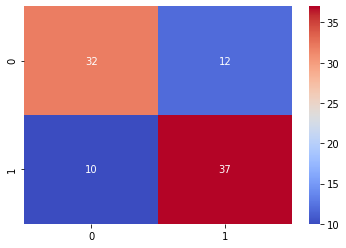

In [23]:
print('Decision Tree Using Information Gain (from scratch)')
my_confusion_matrix(Y_test,y_test_predicted_dt)
calculate_score(Y_test, y_test_predicted_dt)

# 2 (1) Training the model with different percentage of training data

## Decision Tree Using Gini Index (Using Sklearn)

In [24]:
print('******************** Decision Tree Classfier(Gini Index) ********************')
testing_accuracy = []
training_percentage= np.arange(0.5,1,0.05)
for i in range(len(training_percentage)):
    decision_tree_clf = DecisionTreeClassifier(criterion = "gini", random_state=0)
    X_train,X_test,Y_train,Y_test = split_data(training_percentage[i])
    decision_tree_clf.fit(X_train, Y_train)
    
    print('\n Percentage of training data used :',int(100*training_percentage[i]),'%')
    
    y_train_predicted_dt = decision_tree_clf.predict(X_train)
    print('\n Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

    y_test_predicted_dt = decision_tree_clf.predict(X_test)
    
    testing_accuracy.append(100*acc(Y_test, y_test_predicted_dt))
    print('\n Testing accuracy : %.4f' % testing_accuracy[i])
    print('****************************************************')

******************** Decision Tree Classfier(Gini Index) ********************

 Training features have 151 records and Testing features have 152 records.

 Percentage of training data used : 50 %

 Training accuracy : 100.0000

 Testing accuracy : 71.7105
****************************************************

 Training features have 166 records and Testing features have 137 records.

 Percentage of training data used : 55 %

 Training accuracy : 100.0000

 Testing accuracy : 70.8029
****************************************************

 Training features have 181 records and Testing features have 122 records.

 Percentage of training data used : 60 %

 Training accuracy : 100.0000

 Testing accuracy : 69.6721
****************************************************

 Training features have 196 records and Testing features have 107 records.

 Percentage of training data used : 65 %

 Training accuracy : 100.0000

 Testing accuracy : 71.9626
***************************************************

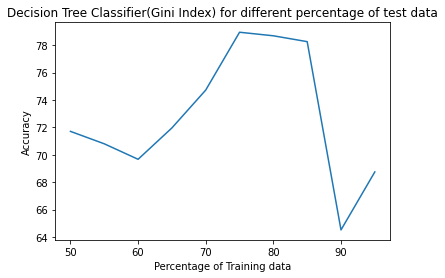

In [25]:
plt.xlabel("Percentage of Training data")
plt.ylabel("Accuracy")
plt.title('Decision Tree Classifier(Gini Index) for different percentage of test data')

plt.plot((100*training_percentage),testing_accuracy)

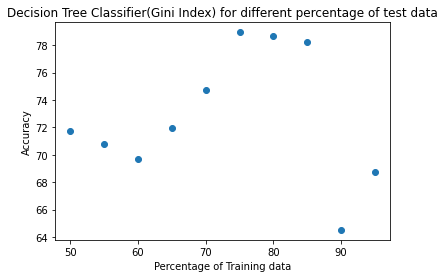

In [26]:
plt.xlabel("Percentage of Training data")
plt.ylabel("Accuracy")
plt.title('Decision Tree Classifier(Gini Index) for different percentage of test data')
plt.scatter((100*training_percentage),testing_accuracy)

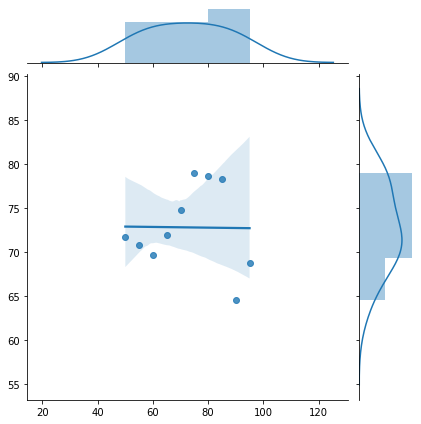

In [27]:
sns.jointplot((100*training_percentage),testing_accuracy,kind="reg")

## Decision Tree Using Information Gain (Using Sklearn)

In [28]:
print('******************** Decision Tree Classfier(Information Gain) ********************')
testing_accuracy = []
training_percentage= np.arange(0.5,1,0.05)
for i in range(len(training_percentage)):
    decision_tree_clf = DecisionTreeClassifier(criterion = "entropy", random_state=0)
    X_train,X_test,Y_train,Y_test = split_data(training_percentage[i])
    decision_tree_clf.fit(X_train, Y_train)
    
    print('\n Percentage of test data used :',int(100*training_percentage[i]),'%')
    
    y_train_predicted_dt = decision_tree_clf.predict(X_train)
    print('\n Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

    y_test_predicted_dt = decision_tree_clf.predict(X_test)
    
    testing_accuracy.append(100*acc(Y_test, y_test_predicted_dt))
    print('\n Testing accuracy : %.4f' % testing_accuracy[i])
    print('****************************************************')

******************** Decision Tree Classfier(Information Gain) ********************

 Training features have 151 records and Testing features have 152 records.

 Percentage of test data used : 50 %

 Training accuracy : 100.0000

 Testing accuracy : 72.3684
****************************************************

 Training features have 166 records and Testing features have 137 records.

 Percentage of test data used : 55 %

 Training accuracy : 100.0000

 Testing accuracy : 72.2628
****************************************************

 Training features have 181 records and Testing features have 122 records.

 Percentage of test data used : 60 %

 Training accuracy : 100.0000

 Testing accuracy : 74.5902
****************************************************

 Training features have 196 records and Testing features have 107 records.

 Percentage of test data used : 65 %

 Training accuracy : 100.0000

 Testing accuracy : 73.8318
****************************************************

 Traini

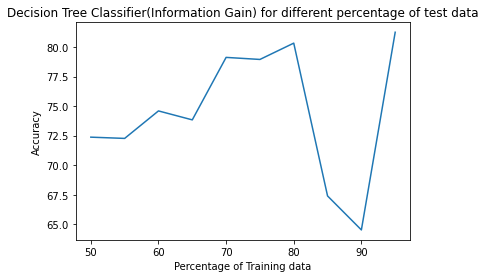

In [29]:
plt.xlabel("Percentage of Training data")
plt.ylabel("Accuracy")
plt.title('Decision Tree Classifier(Information Gain) for different percentage of test data')

plt.plot((100*training_percentage),testing_accuracy)

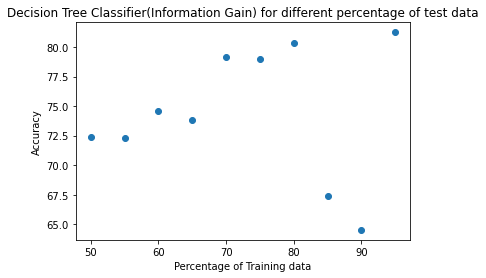

In [30]:
plt.xlabel("Percentage of Training data")
plt.ylabel("Accuracy")
plt.title('Decision Tree Classifier(Information Gain) for different percentage of test data')
plt.scatter((100*training_percentage),testing_accuracy)

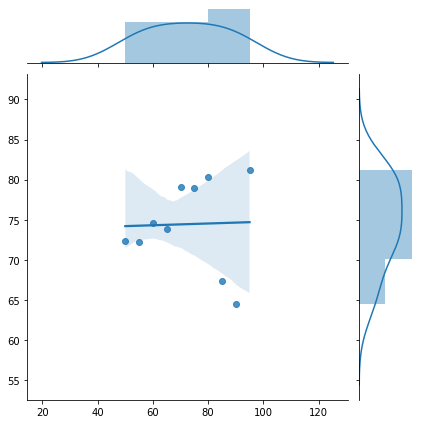

In [31]:
sns.jointplot((100*training_percentage),testing_accuracy,kind="reg")

# 2 (2) Training the model with different depths

## Decision Tree Using Gini Index (Using Sklearn)

In [32]:
print('******************** Decision Tree Classfier(Gini Index) ********************')
testing_accuracy = []
testing_depth= np.arange(1,11)
X_train,X_test,Y_train,Y_test = split_data(0.7)
for i in range(len(testing_depth)):
    decision_tree_clf = DecisionTreeClassifier(criterion = "gini",max_depth=testing_depth[i], random_state=0)
    decision_tree_clf.fit(X_train, Y_train)
    
    print('\n Max Depth Used :',testing_depth[i])
    
    y_train_predicted_dt = decision_tree_clf.predict(X_train)
    print('\n Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

    y_test_predicted_dt = decision_tree_clf.predict(X_test)
    
    testing_accuracy.append(100*acc(Y_test, y_test_predicted_dt))
    print('\n Testing accuracy : %.4f' % testing_accuracy[i])
    print('****************************************************')

******************** Decision Tree Classfier(Gini Index) ********************

 Training features have 212 records and Testing features have 91 records.

 Max Depth Used : 1

 Training accuracy : 75.4717

 Testing accuracy : 76.9231
****************************************************

 Max Depth Used : 2

 Training accuracy : 80.1887

 Testing accuracy : 73.6264
****************************************************

 Max Depth Used : 3

 Training accuracy : 86.7925

 Testing accuracy : 81.3187
****************************************************

 Max Depth Used : 4

 Training accuracy : 86.7925

 Testing accuracy : 76.9231
****************************************************

 Max Depth Used : 5

 Training accuracy : 94.3396

 Testing accuracy : 73.6264
****************************************************

 Max Depth Used : 6

 Training accuracy : 97.1698

 Testing accuracy : 74.7253
****************************************************

 Max Depth Used : 7

 Training accuracy : 98.584

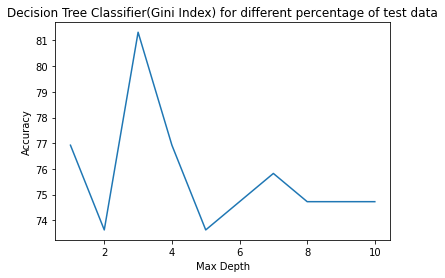

In [33]:
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title('Decision Tree Classifier(Gini Index) for different percentage of test data')

plt.plot(testing_depth,testing_accuracy)

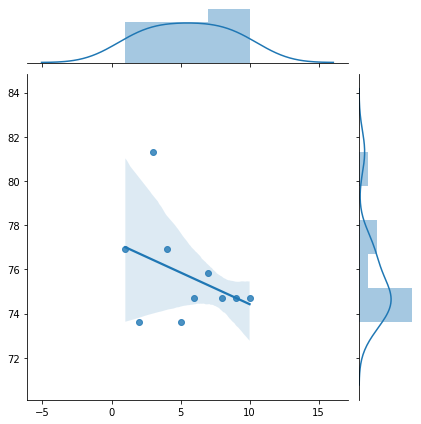

In [34]:
sns.jointplot(testing_depth,testing_accuracy,kind="reg")

## Decision Tree Using Information Gain (Using Sklearn)

In [35]:
print('******************** Decision Tree Classfier(Information Gain) ********************')
testing_accuracy = []
testing_depth= np.arange(1,11)
X_train,X_test,Y_train,Y_test = split_data(0.7)
for i in range(len(testing_depth)):
    decision_tree_clf = DecisionTreeClassifier(criterion = "entropy",max_depth=testing_depth[i], random_state=0)
    decision_tree_clf.fit(X_train, Y_train)
    
    print('\n Max Depth used here :',testing_depth[i])
    
    y_train_predicted_dt = decision_tree_clf.predict(X_train)
    print('\n Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

    y_test_predicted_dt = decision_tree_clf.predict(X_test)
    
    testing_accuracy.append(100*acc(Y_test, y_test_predicted_dt))
    print('\n Testing accuracy : %.4f' % testing_accuracy[i])
    print('****************************************************')

******************** Decision Tree Classfier(Information Gain) ********************

 Training features have 212 records and Testing features have 91 records.

 Max Depth used here : 1

 Training accuracy : 75.4717

 Testing accuracy : 76.9231
****************************************************

 Max Depth used here : 2

 Training accuracy : 78.3019

 Testing accuracy : 73.6264
****************************************************

 Max Depth used here : 3

 Training accuracy : 86.3208

 Testing accuracy : 75.8242
****************************************************

 Max Depth used here : 4

 Training accuracy : 86.7925

 Testing accuracy : 75.8242
****************************************************

 Max Depth used here : 5

 Training accuracy : 94.8113

 Testing accuracy : 79.1209
****************************************************

 Max Depth used here : 6

 Training accuracy : 97.6415

 Testing accuracy : 80.2198
****************************************************

 Max Depth u

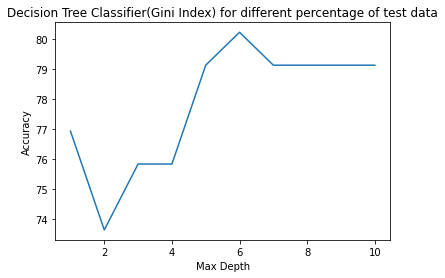

In [36]:
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title('Decision Tree Classifier(Gini Index) for different percentage of test data')

plt.plot(testing_depth,testing_accuracy)

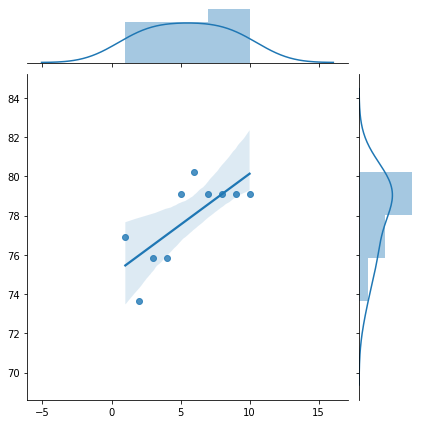

In [37]:
sns.jointplot(testing_depth,testing_accuracy,kind="reg")